
# 19장 세상에 없는 얼굴 GAN, 오토인코더
### 3. 적대적 신경망 실행하기

#### 실습: GAN 모델 만들기

# 이미지 특징을 추출하는 인코더

In [5]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
import matplotlib.pyplot as plt
import numpy as np


In [6]:
# MNIST 데이터셋을 불러옵니다.

(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

In [7]:
# 생성자 모델을 만듭니다.
autoencoder = Sequential()

2024-08-29 09:45:46.622760: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-29 09:45:46.628639: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-29 09:45:46.628871: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-29 09:45:46.628898: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0

In [8]:
# 인코딩 부분입니다.
autoencoder.add(Conv2D(16, kernel_size=3, padding='same', input_shape=(28,28,1), activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding='same', activation='relu'))

In [9]:
# 디코딩 부분이 이어집니다. 
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))

In [10]:
# 전체 구조를 확인해 봅니다.
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 8)           5

Epoch 1/50


2024-08-29 09:52:18.368859: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2024-08-29 09:52:22.051419: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f16deb33b60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-08-29 09:52:22.051480: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-08-29 09:52:22.084550: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-29 09:52:22.372487: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 [==============================] - 11s 9ms/step - loss: 0.2085 - val_loss: 0.1390
Epoch 2/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1291 - val_loss: 0.1199
Epoch 3/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1163 - val_loss: 0.1111
Epoch 4/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1099 - val_loss: 0.1063
Epoch 5/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1057 - val_loss: 0.1029
Epoch 6/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1027 - val_loss: 0.1002
Epoch 7/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1004 - val_loss: 0.0984
Epoch 8/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0986 - val_loss: 0.0967
Epoch 9/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0971 - val_loss: 0.0953
Epoch 10/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0958 - val_loss: 0.0942
Epoch 11/

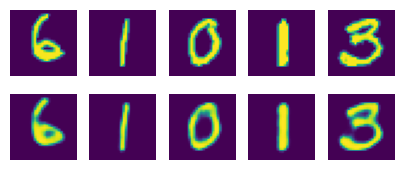

In [12]:
# 컴파일 및 학습을 하는 부분입니다.
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train,
               epochs=50, 
               batch_size=128,
               validation_data=(X_test, X_test))

# 학습된 결과를 출력하는 부분입니다.
# 테스트할 이미지를 랜덤하게 불러옵니다.
random_test = np.random.randint(X_test.shape[0], size=5)

# 앞서 만든 오토인코더 모델에 집어 넣습니다.
ae_imgs = autoencoder.predict(X_test)

# 출력될 이미지의 크기를 정합니다.
plt.figure(figsize=(7,2))

# 랜덤하게 뽑은 이미지를 차례로 나열합니다.
for i, image_idx in enumerate(random_test):
    ax = plt.subplot(2, 7, i + 1)
    
    # 테스트할 이미지를 먼저 그대로 보여줍니다.
    plt.imshow(X_test[image_idx].reshape(28, 28))
    
    ax.axis('off')
    
    ax = plt.subplot(2, 7, 7 + i +1)
    
    # 오토인코딩 결과를 다음열에 출력합니다.
    plt.imshow(ae_imgs[image_idx].reshape(28, 28))
    
    ax.axis('off')
    
plt.show()
